In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from NiaPy import Runner
from NiaPy.algorithms import BasicStatistics
from NiaPy.algorithms.basic import FishSchoolSearch
from NiaPy.algorithms.basic import FireflyAlgorithm
from NiaPy.algorithms.basic import ParticleSwarmAlgorithm
from NiaPy.task import StoppingTask, OptimizationType
from NiaPy.benchmarks import Rastrigin
from NiaPy.benchmarks import Rosenbrock
from NiaPy.benchmarks import Ackley

In [2]:
def optimization(benc, nruns, dim, algo, nf, ngen):
    Time = list()

    stats = np.zeros(nruns)
    print("\nstarting ", algo, benc)
    for i in range(nruns):
        task = StoppingTask(D=dim, nGEN=ngen, nFES=nf, optType=OptimizationType.MINIMIZATION, benchmark=benc)

        timer = time.perf_counter()
        best = algo.run(task)
        Time.append(time.perf_counter() - timer)

        stats[i] = best[1]
        evals, x_f = task.return_conv()

        # print("FSS", best[-1])
    #         print("Number of function evaluations ", evals)  # print function evaluations
    # print(x_f)  # print values

    stat = BasicStatistics(stats)
    print(stat.generate_standard_report())  # generate report
    print(algo.getParameters())
    print("Execution time ", np.mean(Time))
    return best, task
    

Оптимизация функции Розенброка. На функции Розенброка FSS показал наилучший результат по точности минимизации и времени, FA показывает худший по времени результат, однако средний по остальным критериям


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da5323eb38> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da5323eb70>
Min: 0.014124447405192456, Max: 2.9261290923437056, Mean: 0.9219202024642155, Median: 0.8818335563036093, Std. 0.986726957674251
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  0.09334931910002524


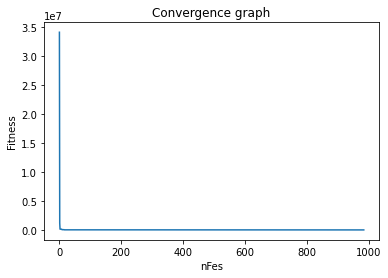


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da8b5a7e10> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da5323eb70>
Min: 0.1792853597224184, Max: 24.439173293285933, Mean: 4.474606214335992, Median: 2.4532164596422894, Std. 7.257786325323946
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  2.53446621070002


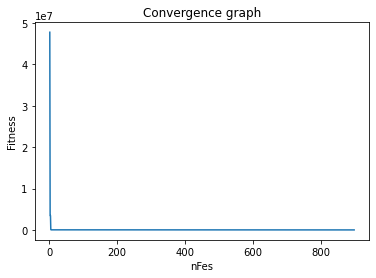


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da8aae5748> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da5323eb70>
Min: 0.5820075163301821, Max: 24.50025958768762, Mean: 12.066385014914886, Median: 15.090780055150091, Std. 9.376693768446838
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  0.10510590649996629


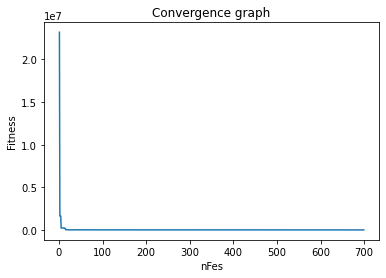

In [3]:
nruns = 10
nf = 1000
ngen = 100
benc = Rosenbrock()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()


Оптимизация функции Растригина
На данном тесте PSO показал лучший результат по всем критериям, кроме max, FSS - средний


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da5323eac8> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da5323eb38>
Min: 0.0006797858654579159, Max: 1.6934474861098678, Mean: 0.56291768264303, Median: 0.3616801305428563, Std. 0.5708535579986396
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  0.09182202929991945


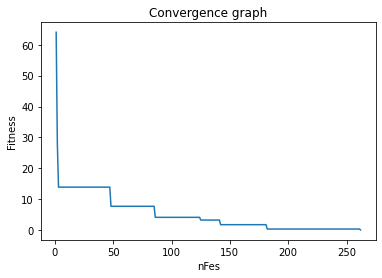


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da510cd9e8> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da5323eb38>
Min: 1.0008001607226902, Max: 5.395560924803682, Mean: 2.1592334622219544, Median: 1.6196987000648697, Std. 1.4346717191541092
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  2.499345404800033


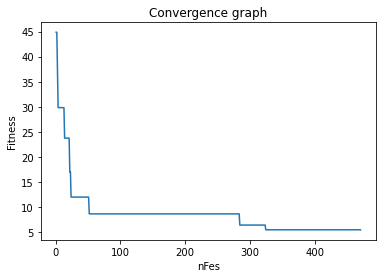


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da5323eb00> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da5323eb38>
Min: 0.017332473212007926, Max: 1.0497419174229314, Mean: 0.25398632096089424, Median: 0.10918083689189118, Std. 0.33146839314484755
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  0.12965645249996668


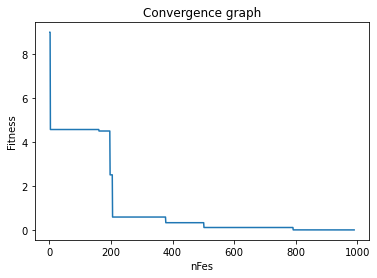

In [4]:
benc = Rastrigin()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

Оптимизация функции Экли
На данной функции FSS снова показывает наилучший результат, в целом ситуация сложилась как в 1 тесте. PSO и FSS обладают хорошей скоростью, FA выдает достаточно неплохой результат, однако выполняется достаточно долго.


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da50f0c198> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50f0cb70>
Min: 0.20307335903543988, Max: 3.896045359629792, Mean: 2.0001969045855246, Median: 1.88116860610281, Std. 1.2121647060160308
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  0.1557597107998845


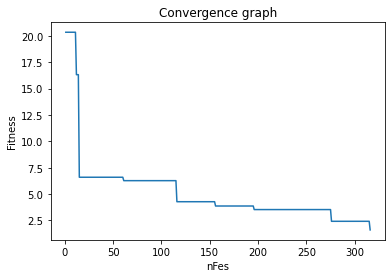


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da50f22d68> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50f0cb70>
Min: 0.04814692995092118, Max: 9.034665239157055, Mean: 2.9907142630516512, Median: 2.8428146574690154, Std. 2.3792035061600774
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  2.7256051556999408


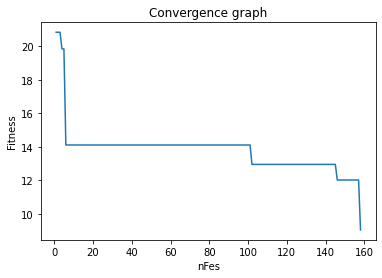


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da50e78d30> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50f0cb70>
Min: 0.1133676168614639, Max: 17.858322506174076, Mean: 7.014541124069583, Median: 6.730936829224807, Std. 6.398952442866493
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  0.1471754157000305


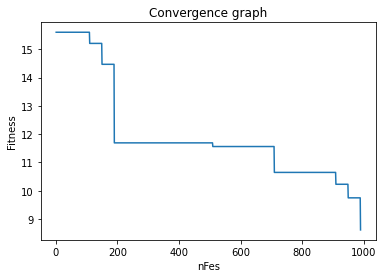

In [5]:
benc = Ackley()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

При увеличении количества итераций до 1000 и количества вызова функций до 10000 алгоритм FSS показывает еще более точный результат, однако начинает проигрывать по времени PSO (1,1 на Экли против 0,1 у PSO), однако точность PSO не увеличивается, как и у FA. Можно сказать, что FSS достаточно хорош по точности как при жестких ограничениях на количество итераций\вызова функций, так и при более мягких ограничениях (при этом выдает наилучшие результаты при более мягких) что является его основным преимуществом. Недостатком является скорость, относительно PSO (который не улучшает своих результатов).

Функция Розенброка


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da510510b8> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da51051390>
Min: 1.2825431747395863e-05, Max: 0.004201380207184747, Mean: 0.000976792121686321, Median: 0.00031149208008299174, Std. 0.0013446140288895336
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  0.8935885929000961


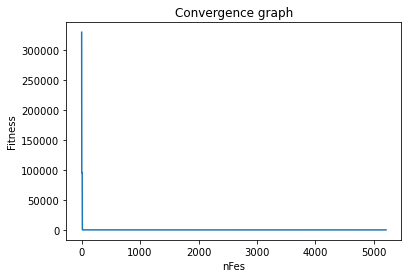


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da50e9b748> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da51051390>
Min: 5.213234154259846e-07, Max: 0.010094618912389091, Mean: 0.0012168532749918374, Median: 3.886280598731431e-05, Std. 0.003151503724990838
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  26.361520726399885


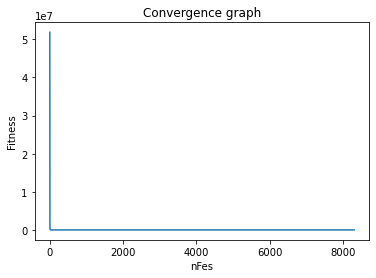


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da89e8f438> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x14da51051390>
Min: 3.902365451814668e-06, Max: 5.832036374394757, Mean: 0.7487573441601195, Median: 0.003830662378873714, Std. 1.8209063910399246
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  0.9921921374999328


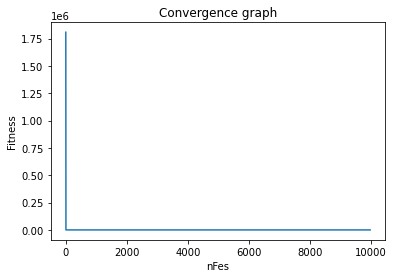

In [6]:
nruns = 10
nf = 10000
ngen = 1000

benc = Rosenbrock()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

Функция Растригина


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da50fd4438> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da50fd4668>
Min: 0.00012310970575057922, Max: 1.241158480054608, Mean: 0.37511114558691505, Median: 0.10287280135860222, Std. 0.474753286158323
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  0.925112536999859


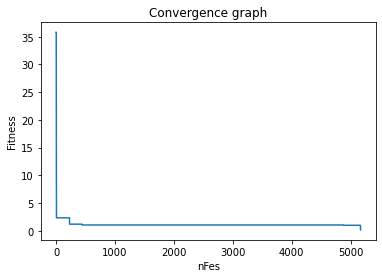


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da5323ed30> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da50fd4668>
Min: 1.1799485832852952e-09, Max: 0.9949613499970091, Mean: 0.37091059046899594, Median: 0.003958387607841729, Std. 0.48387882764902634
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  25.75637824510004


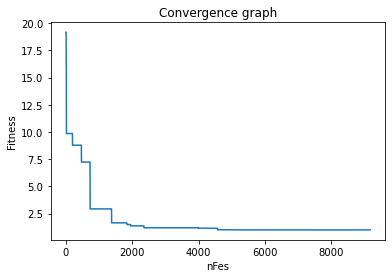


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da50e9dbe0> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x14da50fd4668>
Min: 0.0, Max: 3.446132268436486e-13, Mean: 4.3698378249246164e-14, Median: 1.7763568394002505e-15, Std. 1.0667413533064194e-13
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  1.076086095500068


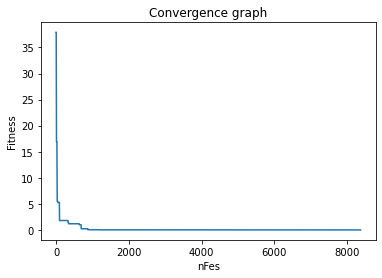

In [7]:
benc = Rastrigin()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

Функция Экли


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x14da50fd7208> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50fd71d0>
Min: 0.00019212157812420472, Max: 0.021653028647112382, Mean: 0.007099365384828804, Median: 0.0033103521109940637, Std. 0.007712195174076569
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'SI_init': 0.3, 'SI_final': 5, 'SV_init': 0.3, 'SV_final': 5, 'min_w': 0.2, 'w_scale': 0.8}
Execution time  1.2684750645000349


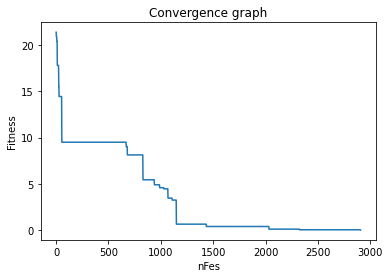


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x14da50e26dd8> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50fd71d0>
Min: 0.00021304751566164626, Max: 0.001866430596440427, Mean: 0.0009409355134153863, Median: 0.0009245584218438019, Std. 0.0005324120959858877
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None}
Execution time  26.221779526199953


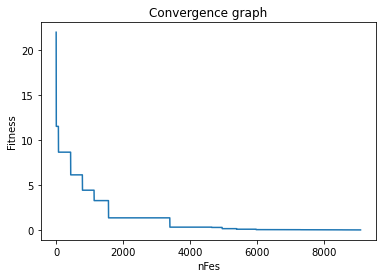


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x14da50fd7c88> <NiaPy.benchmarks.ackley.Ackley object at 0x14da50fd71d0>
Min: 2.3537127802342184e-10, Max: 0.0004186766061740066, Mean: 4.4521540511954784e-05, Median: 1.229416110692938e-06, Std. 0.00013154462109129657
{'NP': 40, 'InitPopFunc': <function defaultNumPyInit at 0x14da652d8d90>, 'itype': None, 'C1': 2.0, 'C2': 2.0, 'w': 0.7, 'vMin': -1.5, 'vMax': 1.5}
Execution time  1.43621176630013


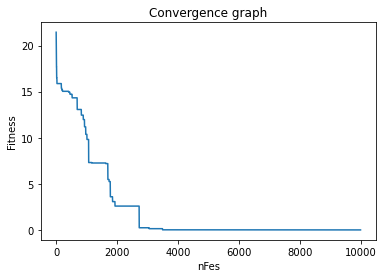

In [8]:
benc = Ackley()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
X_fss, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
X_ff, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
X_pso, task = optimization(benc, nruns, 2, algo, nf, ngen)
task.plot()